<a href="https://colab.research.google.com/github/AkshithaRao123/Detecting-Signs-of-Depression/blob/main/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# !rm -r sample_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def w2d(img, wavelet, level):
    imArray = img
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, wavelet, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    arrH = pywt.waverec2(coeffs_H, wavelet)
    arrH += 255
    arrH = np.uint8(arrH)
    return arrH

In [ ]:
filepath = "/content/drive/MyDrive/Microexps/train"

In [ ]:
img = cv2.imread(f"{filepath}/fear/fear52.jpg", cv2.IMREAD_GRAYSCALE)

array([[185, 188, 187, ..., 116, 142, 108],
       [183, 188, 188, ..., 112, 134, 130],
       [185, 190, 189, ..., 111, 121, 116],
       ...,
       [158,  94,  68, ..., 104, 133, 135],
       [154, 114,  63, ..., 123, 135, 153],
       [145, 138,  73, ..., 118, 139, 171]], dtype=uint8)
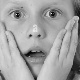

In [ ]:
img

In [ ]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


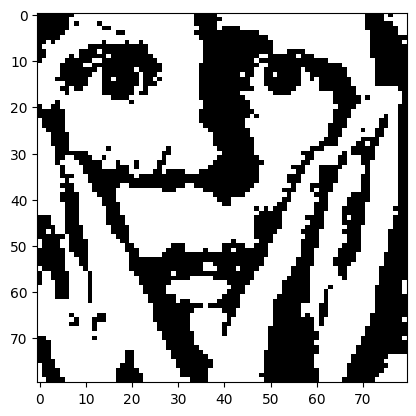

In [ ]:
im_har = w2d(img,'bior2.4',4)
plt.imshow(im_har, cmap='gray')

In [ ]:
class_dict = {'anger': 0, 'disgust': 1, 'fear': 2, 'happiness': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}

In [ ]:
%matplotlib inline

anger : 1
anger : 2
anger : 3
anger : 4
anger : 5
anger : 6
anger : 7
anger : 8
anger : 9
anger : 10
anger : 11
anger : 12
anger : 13
anger : 14
anger : 15
anger : 16
anger : 17
anger : 18
anger : 19
anger : 20
anger : 21
anger : 22
anger : 23
anger : 24
anger : 25
anger : 26
anger : 27
anger : 28
anger : 29
anger : 30
anger : 31
anger : 32
anger : 33
anger : 34
anger : 35
anger : 36
anger : 37
anger : 38
anger : 39
anger : 40
anger : 41
anger : 42
anger : 43
anger : 44
anger : 45
anger : 46
anger : 47
anger : 48
anger : 49
anger : 50
anger : 51
anger : 52
anger : 53
anger : 54
anger : 55
anger : 56
anger : 57
anger : 58
anger : 59
anger : 60
anger : 61
anger : 62
anger : 63
anger : 64
anger : 65
anger : 66
anger : 67
anger : 68
anger : 69
anger : 70
anger : 71
anger : 72
anger : 73
anger : 74
anger : 75
anger : 76
anger : 77
anger : 78
anger : 79
anger : 80
anger : 81
anger : 82
anger : 83
anger : 84
anger : 85
anger : 86
anger : 87
anger : 88
anger : 89
anger : 90
anger : 91
anger : 

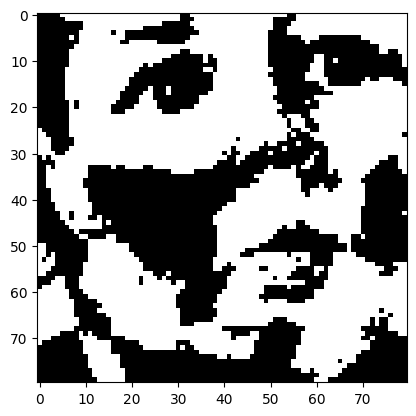

In [ ]:
X=[]; y=[]

for classname in class_dict.keys():
  for i in range(1, 500):
    img = cv2.imread(f"{filepath}/{classname}/{classname}{i}.jpg", cv2.IMREAD_GRAYSCALE)
    if img is None:
      continue
    scaled_raw_img = cv2.resize(img, (80,80))
    img_har = w2d(img,'bior2.4',4)
    scaled_img_har = cv2.resize(img_har, (80,80))
    combined_img = np.vstack((scaled_raw_img.reshape(80*80, 1), scaled_img_har.reshape(80*80*1, 1)))
    X.append(combined_img)
    plt.imshow(scaled_raw_img, cmap='gray')
    plt.imshow(scaled_img_har, cmap='gray')
    y.append(class_dict[classname])

    # just to debug
    print(classname, ":", i)

In [ ]:
len(X)

3466

In [ ]:
80*80 + 80*80

12800

In [ ]:
X = np.array(X).reshape(len(X), 12800).astype(float)

In [ ]:
X[0]

array([ 58.,  46.,  53., ..., 255., 255., 255.])

In [ ]:
filepath_test = "/content/drive/MyDrive/Microexps/test"

anger : 1
anger : 2
anger : 3
anger : 4
anger : 5
anger : 6
anger : 7
anger : 8
anger : 9
anger : 10
anger : 11
anger : 12
anger : 13
anger : 14
anger : 15
anger : 16
anger : 17
anger : 18
anger : 19
anger : 20
anger : 21
anger : 22
anger : 23
anger : 24
anger : 25
anger : 26
anger : 27
anger : 28
anger : 29
anger : 30
anger : 31
anger : 32
anger : 33
anger : 34
anger : 35
anger : 36
anger : 37
anger : 38
anger : 39
anger : 40
anger : 41
anger : 42
anger : 43
anger : 44
anger : 45
anger : 46
anger : 47
anger : 48
anger : 49
anger : 50
anger : 51
anger : 52
anger : 53
anger : 54
anger : 55
anger : 56
anger : 57
anger : 58
anger : 59
anger : 60
anger : 61
anger : 62
anger : 63
anger : 64
anger : 65
anger : 66
anger : 67
anger : 68
anger : 69
anger : 70
anger : 71
anger : 72
anger : 73
anger : 74
anger : 75
anger : 76
anger : 77
anger : 78
anger : 79
anger : 80
anger : 81
anger : 82
anger : 83
anger : 84
anger : 85
anger : 86
anger : 87
anger : 88
anger : 89
anger : 90
anger : 91
anger : 

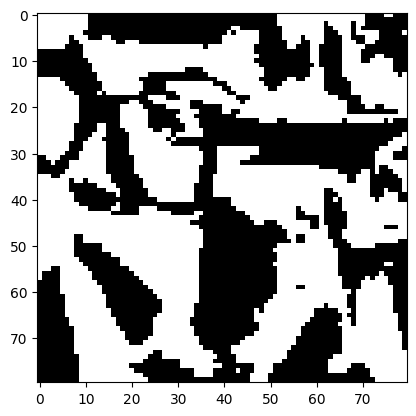

In [ ]:
X_test=[]; y_test=[]

for classname in class_dict.keys():
  for i in range(1, 500):
    img = cv2.imread(f"{filepath_test}/{classname}/{classname}{i}.jpg", cv2.IMREAD_GRAYSCALE)
    if img is None:
      break
    scaled_raw_img = cv2.resize(img, (80,80))
    img_har = w2d(img,'bior2.4',4)
    scaled_img_har = cv2.resize(img_har, (80,80))
    combined_img = np.vstack((scaled_raw_img.reshape(80*80, 1), scaled_img_har.reshape(80*80*1, 1)))
    # print(X_test)
    X_test.append(combined_img)
    plt.imshow(scaled_raw_img, cmap='gray')
    plt.imshow(scaled_img_har, cmap='gray')
    y_test.append(class_dict[classname])

    # just to debug
    print(classname, ":", i)

In [ ]:
X_test = np.array(X_test).reshape(len(X_test), 12800).astype(float)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X, y)
y_pred = pipe.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6005376344086022

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.56955463854489

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.5868253770039484

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.5730266123059052

In [ ]:
joblib.dump(pipe, "svm_model1.joblib")

['svm_model1.joblib']

In [ ]:
model = joblib.load("svm_model1.joblib")
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[200,  31,  19,  23,  22,  34,  21],
       [ 24,  88,   3,  14,   7,  15,   9],
       [  6,  11,  58,   5,   7,  12,  21],
       [ 22,  46,  24, 319,   8,  45,  16],
       [ 17,  15,   8,   3, 102,  14,   1],
       [ 47,  27,  23,  24,  21, 178,  10],
       [ 12,  10,  39,  14,   4,   9, 172]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[200,  31,  19,  23,  22,  34,  21],
       [ 24,  88,   3,  14,   7,  15,   9],
       [  6,  11,  58,   5,   7,  12,  21],
       [ 22,  46,  24, 319,   8,  45,  16],
       [ 17,  15,   8,   3, 102,  14,   1],
       [ 47,  27,  23,  24,  21, 178,  10],
       [ 12,  10,  39,  14,   4,   9, 172]])

In [ ]:
accuracy_score(y_test, y_pred)

0.6005376344086022

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.56955463854489

In [ ]:
img = cv2.imread(f"{filepath}/fear/fear52.jpg", cv2.IMREAD_GRAYSCALE)